Figure 5

The purpose of this notebook is to plot the sgRNAs along the length of BRCA1. We will make two plots: 1 for ABE and 1 for CBE. Both plots will use the averaged NG + SpG data, as well as averaged HAP1 + MELJUSO. 

1. For intermediate/active PAMs, we'll plot all nonsense, missense, and silent guides + label validation guides 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import percentile
import numpy as np
import gpplot as gpp
# Set default settings for plotting
sns.set(style='ticks',context='paper')
mpl.rc('pdf', fonttype=42)
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

In [2]:
def get_colors():
    color_dict = {
        'Splice site':sns.color_palette('Set2')[4],
        'Nonsense':sns.color_palette('Set2')[5],
        'Missense':sns.color_palette('Set2')[3],
        'Intron':sns.color_palette('Set2')[6],
        'Silent':sns.color_palette('Set2')[2],
        'UTR':'#a45ab0',
        'No edits':sns.color_palette('Set2')[1],
        'orange':'#fc8d62',
        'teal':'#66c2a5',
        'lime':'#a6d854',
        'pink':'#e78ac3',
        'purple':'#8da0cb',
        'Targeting control':sns.color_palette('Set2')[7],
        'Intergenic control':sns.color_palette('Set2')[7],
        'Non-targeting control':sns.color_palette('Set2')[7],
        'Intron/UTR':sns.color_palette('Set2')[6]
    }
    return color_dict
color_dict = get_colors()

In [3]:
#removed dashed line (linepos)
def stem_plot_v2(ycol,df,xcol,ylabel,title,xlims,ylims,xlabel,xticks,yticks,n_position,d1,d2,d3,
             label_points):

    #Set style/parameters for plot
    fig = plt.figure(figsize=(3,2))
    ax = plt.gca()
    ax.set_title(title, fontsize=8)
    sns.despine()
    ax.tick_params(length=2, width=0.5,labelsize=6)
    
    for _,s in ax.spines.items():
        s.set_linewidth(0.5)
        
    # Draw shaded area on scatter plot to span x1 and x2 values
    ax.axvspan(d1[0],d1[1],facecolor=sns.color_palette('Set2')[7],alpha=0.5,edgecolor=None)
    ax.axvspan(d2[0],d2[1],facecolor=sns.color_palette('Set2')[7],alpha=0.5,edgecolor=None)
    ax.axvspan(d3[0],d3[1],facecolor=sns.color_palette('Set2')[7],alpha=0.5,edgecolor=None)

    
    # Adds a dashed line to plots at y = 'linepos'
    #for pos in linepos:
        #ax.axhline(pos,color='black',linestyle='dashed',zorder=3,linewidth=0.5)

    #Make stem plot
    mut_types=['Missense', 'Silent', 'Nonsense']
    count = 0
    for mut_type in mut_types: 
        data = df[df['Mutation bin'] == mut_type]
        count = count + len(data)
        ax.scatter(data[xcol],data[ycol],c=[color_dict[mut_type]],label = mut_type, s=15,zorder=3,alpha=1,linewidths=0.01)
    
    #Label validation guides
    if label_points != {}:
        for k in label_points.keys():
            name = label_points[k]
            x = df.loc[df['Construct Barcode'] == k,xcol].item()
            y = df.loc[df['Construct Barcode'] == k,ycol].item()
            c = color_dict[df.loc[df['Construct Barcode'] == k,'Mutation bin'].item()]
            if ~np.isnan(x):
                plt.plot([x,x+20], [y,y+1],c='black',zorder=4,linewidth=.5)
                ax.text(x+20,y+1,name,fontsize=6)
                ax.scatter(x,y,color=c,s=15,zorder=3,linewidths=0.1,
                          edgecolors='black')

    
    #Stem plot formating
    #ax.legend(bbox_to_anchor=(1, 1.05),loc=2,prop={'size': 6},framealpha=0.5)
    ax.set_xlabel('Amino acid residue',fontsize=8,color='black')
    ax.set_ylabel(ylabel,fontsize=8,color='black')
    ax.text(n_position, ylims[0]+0.5, 'n: ' + str(count),fontsize=6,color='black')
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    
#     plt.tight_layout()
    plt.show()
    return fig,ax



In [4]:
brca1_ng_cbe = pd.read_csv('../../data_v3/Fig 5_6_BRCA1/processed/BRCA1-NG-CBE_LFC.csv')

In [5]:
brca1_spg_cbe = pd.read_csv('../../data_v3/Fig 5_6_BRCA1/processed/BRCA1-SpG-CBE_LFC_v2.csv')

In [6]:
#merge ng and spg

brca1_cbe = pd.merge(brca1_ng_cbe, brca1_spg_cbe, on = 'Construct Barcode', how='inner')


In [7]:
#average together ng and spg

brca1_cbe['Average_NG_SpG_zscore'] = brca1_cbe[['AvgHAP1_Meljuso;z-score_x', 'AvgHAP1_Meljuso;z-score_y']].mean(axis=1)

In [8]:
#subset df

brca1_cbe = brca1_cbe[['Construct Barcode', 'Median Residues_x', 'Average_NG_SpG_zscore', 'Mutation bin_x', 'PAM_x']]

brca1_cbe = brca1_cbe.rename(columns= {'Median Residues_x' : 'Median Residues',
                                      'Mutation bin_x': 'Mutation bin',
                                      'PAM_x': 'PAM'})

In [9]:
#merge on intermediate/active PAMs with either NG or SpG -- PAM list 3
pamlist3 = pd.read_csv('../../data_v3/pam_lists/2021-05-11_PAM list 3_v2.csv')

In [10]:
brca1_int_active = pd.merge(brca1_cbe, pamlist3, on = 'PAM', how='inner')

In [11]:
#add controls back in (they were lost when we merged with the PAM list)

#brca1_int_active_ctrls = pd.concat([brca1_int_active, controls])

In [12]:
brca1_validation = {'GTCACCCCTAAAGAGATCAT' : 'sg1',
'AGGAACCTGTCTCCACAAAG' : 'sg2',
'GTATCTTCAGAAGAATCAGA' : 'sg3',
'TGATCTCCCACACTATAGGG' : 'sg4',
'CATCCAGAAAAGTATCAGGG' : 'sg5',
'ACAAATAAATTAAAGCGTAA' : 'sg6',
'GCTTTCTTGATAAAATCCTC' : 'sg7',
'ACTCATTACTCCAAATAAAC' : 'sg8',
'ATTCCTAGAAAATATTTCAG' : 'sg9',
'GAAACCACCAAGGTCCAAAG' : 'sg10',
'GAACATCTTCAGTATCTCTA' : 'sg11',
'TATTTCACCATCATCTAACA' : 'sg12',
'GCTAACTTCCAGTAACGAGA' : 'sg13',
'TATATCATTCTTACATAAAG' : 'sg14',
'TTACATAAAGGACACTGTGA' : 'sg15',
'TATCCACAATTCAAAAGCAC' : 'sg16',
'TAACCACTCAGGTAAAAAGC' : 'sg17',
'TCATCAACCCAGTAATAATG' : 'sg18',
'TTCTACCAGTAAAAATAAAG' : 'sg19',   
}

In [13]:
validation_int_active = {'GTCACCCCTAAAGAGATCAT' : 'sg1',
    'AGGAACCTGTCTCCACAAAG':  'sg2',
    'ATTCCTAGAAAATATTTCAG' : 'sg9',
    'GAAACCACCAAGGTCCAAAG' : 'sg10',
    'GAACATCTTCAGTATCTCTA' : 'sg11',
    'TATTTCACCATCATCTAACA' : 'sg12',
    #'GCTAACTTCCAGTAACGAGA' : 'sg13',
    #'TATATCATTCTTACATAAAG' : 'sg14',
    'TTACATAAAGGACACTGTGA' : 'sg15',
    #'TATCCACAATTCAAAAGCAC' : 'sg16',
    #'TAACCACTCAGGTAAAAAGC' : 'sg17',
    #'TCATCAACCCAGTAATAATG' : 'sg18',
    #'TTCTACCAGTAAAAATAAAG' : 'sg19'
    
}


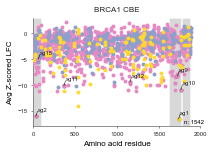

In [15]:
col = 'Average_NG_SpG_zscore'
fig,ax = stem_plot_v2(
    ycol=col,
    df=brca1_int_active,
    xcol='Median Residues',
    ylabel='Avg Z-scored LFC',
    title='BRCA1 CBE',
    xlims=[0,2000],
    ylims=[-18,3],
    xlabel='Amino acid residue',
    xticks=[0,500,1000,1500,2000],
    yticks=[-15,-10,-5,0],
    n_position = 1800,
    d1 = [1,102],
    d2= [1629, 1774],
    d3= [1780, 1878],
    label_points=validation_int_active)
fig.savefig('../../Figures/panels/Fig 5/BRCA1_CBE_stem_v3.pdf',dpi=1000, bbox_inches='tight', transparent=True)

In [73]:
#ABE

In [83]:
brca1_ng_abe = pd.read_csv('../../data_v3/Fig 5_6_BRCA1/processed/BRCA1-NG-ABE8e_LFC.csv')

In [84]:
brca1_spg_abe = pd.read_csv('../../data_v3/Fig 5_6_BRCA1/processed/BRCA1-SpG-ABE8e_LFC_v2.csv')

In [85]:
#merge ng and spg

brca1_abe = pd.merge(brca1_ng_abe, brca1_spg_abe, on = 'Construct Barcode', how='inner')


In [86]:
#average together ng and spg

brca1_abe['Average_NG_SpG_zscore'] = brca1_abe[['AvgHAP1_Meljuso;z-score_x', 'AvgHAP1_Meljuso;z-score_y']].mean(axis=1)

In [87]:
#subset df

brca1_abe = brca1_abe[['Construct Barcode', 'Median Residues_x', 'Average_NG_SpG_zscore', 'Mutation bin_x', 'PAM_x']]

brca1_abe = brca1_abe.rename(columns= {'Median Residues_x' : 'Median Residues',
                                      'Mutation bin_x': 'Mutation bin',
                                      'PAM_x': 'PAM'})

In [88]:
brca1_abe_int_active = pd.merge(brca1_abe, pamlist3, on = 'PAM', how='inner')

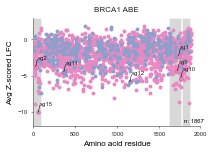

In [97]:
col = 'Average_NG_SpG_zscore'
fig,ax = stem_plot_v2(
    ycol=col,
    df=brca1_abe_int_active,
    xcol='Median Residues',
    ylabel='Avg Z-scored LFC',
    title='BRCA1 ABE',
    xlims=[0,2000],
    ylims=[-12,3],
    xlabel='Amino acid residue',
    xticks=[0,500,1000,1500,2000],
    yticks=[-10,-5,0],
    n_position = 1800,
    d1 = [1,102],
    d2= [1629, 1774],
    d3= [1780, 1878],
    label_points=validation_int_active)
fig.savefig('../../Figures/panels/Fig 5/BRCA1_ABE_stem.pdf',dpi=1000, bbox_inches='tight', transparent=True)